# Implementacja optymalizacji gradientowej

In [21]:
#pip install numpy pandas matplotlib seaborn scikit-learn plotly tensorflow


In [22]:
#pip install nbformat

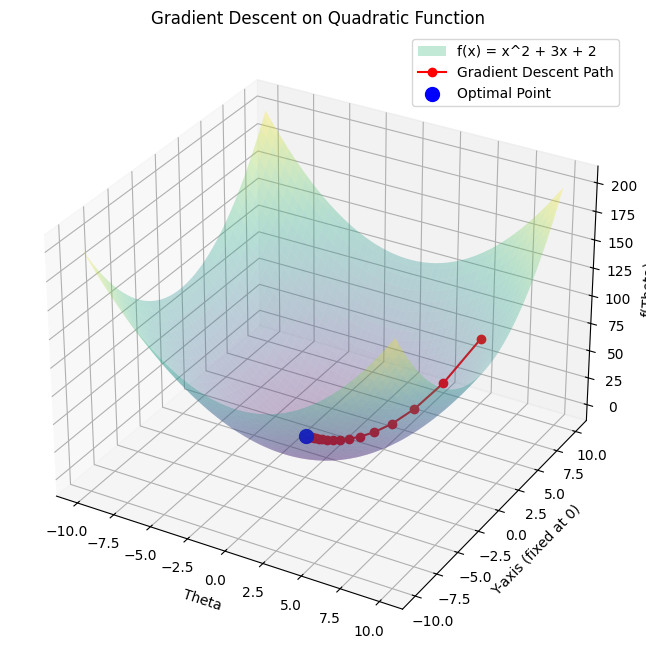

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Gradient descent function
def gradient_descent(f, grad_f, theta_init, learning_rate, iterations):
    theta = theta_init
    trajectory = [theta]  # Store theta values for visualization
    for i in range(iterations):
        theta -= learning_rate * grad_f(theta)
        trajectory.append(theta)
    return theta, trajectory

# Quadratic function and its gradient
f = lambda x: x**2 + 3*x + 2
grad_f = lambda x: 2*x + 3

# Parameters for gradient descent
theta_init = 10.0
learning_rate = 0.1
iterations = 20
# Perform gradient descent
optimal_theta, trajectory = gradient_descent(f, grad_f, theta_init, learning_rate, iterations)
# Create a grid for visualization
x = np.linspace(-10, 10, 400)
y = f(x)

# Prepare 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the quadratic surface
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

ax.plot_surface(X, Y, Z, label='f(x) = x^2 + 3x + 2'  ,alpha=0.3, cmap='viridis')

# Plot trajectory
trajectory_x = trajectory
trajectory_y = np.zeros_like(trajectory)  # Single variable optimization
trajectory_z = [f(t) for t in trajectory]

ax.plot(trajectory_x, trajectory_y, trajectory_z, color='red', marker='o', label='Gradient Descent Path')
ax.scatter(optimal_theta, 0, f(optimal_theta), color='blue', s=100, label='Optimal Point')

# Labeling the plot
ax.set_xlabel("Theta")
ax.set_ylabel("Y-axis (fixed at 0)")
ax.set_zlabel("f(Theta)")
ax.set_title("Gradient Descent on Quadratic Function")
ax.legend()

plt.show()


In [24]:
# Create 3D interactive plot
fig = go.Figure()

# Add surface
fig.add_trace(go.Surface(z=Z, x=X, y=Y, colorscale='Viridis', opacity=0.7, name="Quadratic Surface"))

# Add gradient descent trajectory
fig.add_trace(go.Scatter3d(
    x=trajectory_x, 
    y=trajectory_y, 
    z=trajectory_z, 
    mode='markers+lines', 
    marker=dict(size=5, color='red'),
    line=dict(color='red', width=2),
    name="Gradient Descent Path"
))

# Add optimal point
fig.add_trace(go.Scatter3d(
    x=[optimal_theta], 
    y=[0], 
    z=[f(optimal_theta)], 
    mode='markers',
    marker=dict(size=10, color='blue'),
    name="Optimal Point"
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title="Theta",
        yaxis_title="Y-axis (fixed at 0)",
        zaxis_title="f(Theta)",
    ),
    title="Interactive Gradient Descent Visualization on Quadratic Function",
    width=800,  # Szerokość w pikselach
    height=600,  # Wysokość w pikselach
)

# Show the interactive plot
fig.show()

# Projektowanie i trenowanie prostych sieci w TensorFlow

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Dane treningowe (prosta zależność liniowa)
X_train = np.random.rand(100, 1)
y_train = 3 * X_train + 2 + np.random.randn(100, 1) * 0.1  # y = 3x + 2 + szum

# Najprostszy model regresji: 1 wejście, 1 wyjście, brak aktywacji
model = Sequential([
    Dense(1, input_shape=(1,))
])

# Kompilacja modelu z MSE
model.compile(optimizer='adam', loss='mse')

# Trening modelu
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Generowanie zbioru testowego
X_test = np.linspace(0, 1, 10).reshape(-1, 1)
y_test = 3 * X_test + 2

# Ewaluacja modelu na zbiorze testowym
loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss na zbiorze testowym: {loss}")

# Prognozowanie dla nowych danych
new_data = np.array([[0.2], [0.4], [0.6], [0.8], [1.0]])
predictions = model.predict(new_data)

# Wyświetlenie wyników prognozowania
print("Prognozowane wartości dla nowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: {prediction[0]}")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2685  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.0761 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4483 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.6333 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.3905 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.2299 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8050 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.9025 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.2389 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4359 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.4798 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5681 
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.7209 
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8452 
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.1598 
Epoch 16/50
7/7 ━━

# Projektowanie i trenowanie prostych sieci w PyTorch

In [26]:
# brak wizualizacji - główne kroki
import torch
import torch.nn as nn

# Definicja modelu
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Trening
X_train = torch.rand(100, 10)
y_train = torch.rand(100, 1)

for epoch in range(10):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

Epoka 1/50, Błąd: 0.4004
Epoka 2/50, Błąd: 0.1998
Epoka 3/50, Błąd: 0.1052
Epoka 4/50, Błąd: 0.1231
Epoka 5/50, Błąd: 0.1263
Epoka 6/50, Błąd: 0.1062
Epoka 7/50, Błąd: 0.1057
Epoka 8/50, Błąd: 0.0979
Epoka 9/50, Błąd: 0.0923
Epoka 10/50, Błąd: 0.0952
Epoka 11/50, Błąd: 0.0936
Epoka 12/50, Błąd: 0.0914
Epoka 13/50, Błąd: 0.0890
Epoka 14/50, Błąd: 0.0876
Epoka 15/50, Błąd: 0.0875
Epoka 16/50, Błąd: 0.0863
Epoka 17/50, Błąd: 0.0850
Epoka 18/50, Błąd: 0.0840
Epoka 19/50, Błąd: 0.0834
Epoka 20/50, Błąd: 0.0827
Epoka 21/50, Błąd: 0.0819
Epoka 22/50, Błąd: 0.0812
Epoka 23/50, Błąd: 0.0803
Epoka 24/50, Błąd: 0.0795
Epoka 25/50, Błąd: 0.0787
Epoka 26/50, Błąd: 0.0779
Epoka 27/50, Błąd: 0.0771
Epoka 28/50, Błąd: 0.0762
Epoka 29/50, Błąd: 0.0754
Epoka 30/50, Błąd: 0.0745
Epoka 31/50, Błąd: 0.0737
Epoka 32/50, Błąd: 0.0728
Epoka 33/50, Błąd: 0.0719
Epoka 34/50, Błąd: 0.0710
Epoka 35/50, Błąd: 0.0704
Epoka 36/50, Błąd: 0.0694
Epoka 37/50, Błąd: 0.0685
Epoka 38/50, Błąd: 0.0676
Epoka 39/50, Błąd: 0.

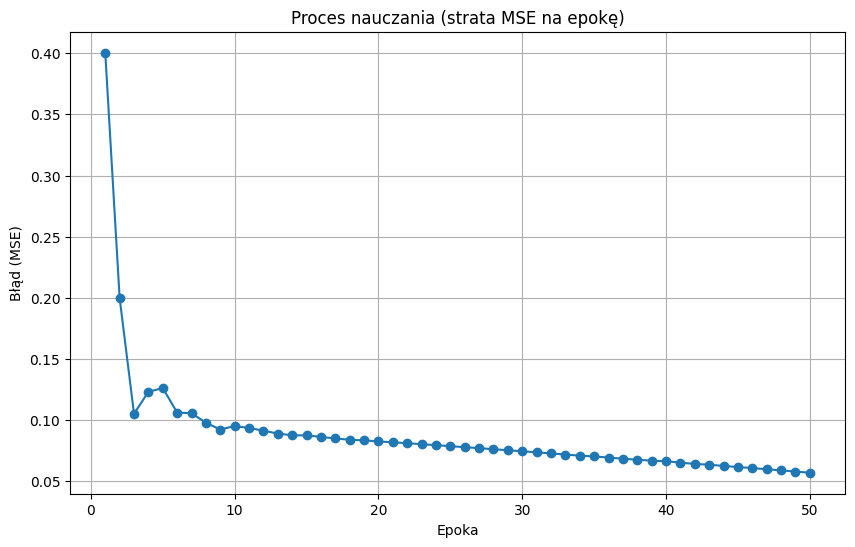

Błąd na zbiorze testowym (MSE): 0.1036
Prognozowane wartości dla nowych danych:
Przykład 1: 0.4717
Przykład 2: 0.4394
Przykład 3: 0.3869
Przykład 4: 0.5718
Przykład 5: 0.5545


In [27]:
# z wizualizacją nauczania, ewaluacją i prognozowaniem
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Definicja modelu
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(10, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        return self.fc2(x)

# Inicjalizacja modelu
model = SimpleNN()

# Funkcja kosztu i optymalizator
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Dane treningowe
X_train = torch.rand(100, 10)
y_train = torch.rand(100, 1)

# Dane testowe
X_test = torch.rand(20, 10)
y_test = torch.rand(20, 1)

# Parametry trenowania
epochs = 50
batch_size = 32
num_batches = len(X_train) // batch_size
loss_history = []

# Proces nauczania
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        # Pobranie batcha
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Średni błąd dla epoki
    epoch_loss /= num_batches
    loss_history.append(epoch_loss)
    print(f"Epoka {epoch+1}/{epochs}, Błąd: {epoch_loss:.4f}")

# Wizualizacja procesu nauczania
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history, marker='o')
plt.xlabel('Epoka')
plt.ylabel('Błąd (MSE)')
plt.title('Proces nauczania (strata MSE na epokę)')
plt.grid()
plt.show()

# Ewaluacja na zbiorze testowym
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    test_loss = loss_fn(y_test_pred, y_test).item()
    print(f"Błąd na zbiorze testowym (MSE): {test_loss:.4f}")

# Prognozowanie dla nowych danych
new_data = torch.rand(5, 10)  # 5 nowych próbek
with torch.no_grad():
    predictions = model(new_data)

# Wyświetlenie wyników prognozowania
print("Prognozowane wartości dla nowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: {prediction.item():.4f}")


# Zastosowanie konwolucyjnych sieci neuronowych (CNN) do analizy obrazu

Epoch 1/10


g:\PROGRAMOWANIE\python\machine_learning\lab4\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9114 - loss: 0.2966 - val_accuracy: 0.9847 - val_loss: 0.0486
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9863 - loss: 0.0423 - val_accuracy: 0.9867 - val_loss: 0.0390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9892 - val_loss: 0.0339
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9937 - loss: 0.0202 - val_accuracy: 0.9907 - val_loss: 0.0294
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9953 - loss: 0.0141 - val_accuracy: 0.9921 - val_loss: 0.0248
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9969 - loss: 0.0097 - val_accuracy: 0.9898 - val_loss: 0.0341
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9898 - val_loss: 0.0345
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9978 - loss: 0.0068 - val_accurac

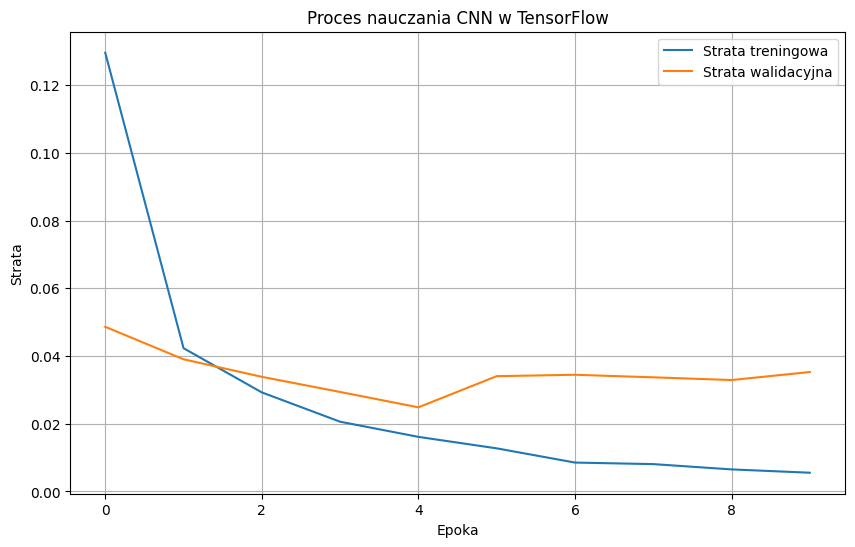

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9897 - loss: 0.0409
Dokładność modelu na zbiorze testowym: 0.99%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prognozowane etykiety dla przykładowych danych:
Przykład 1: Prognozowana etykieta: 7
Przykład 2: Prognozowana etykieta: 2
Przykład 3: Prognozowana etykieta: 1
Przykład 4: Prognozowana etykieta: 0
Przykład 5: Prognozowana etykieta: 4


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Przygotowanie danych
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# Przekształcanie danych
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encoding etykiet
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Budowa modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Trenowanie modelu
epochs = 10
batch_size = 32
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
# Wizualizacja procesu nauczania
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Strata treningowa')
plt.plot(history.history['val_loss'], label='Strata walidacyjna')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Proces nauczania CNN w TensorFlow')
plt.legend()
plt.grid()
plt.show()

# Testowanie modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Dokładność modelu na zbiorze testowym: {accuracy:.2f}%")

# Prognozowanie dla nowych danych
new_data = X_test[:5]  # Przykładowe dane testowe
predictions = model.predict(new_data)

# Wyświetlenie wyników prognozowania
print("Prognozowane etykiety dla przykładowych danych:")
for i, prediction in enumerate(predictions):
    print(f"Przykład {i + 1}: Prognozowana etykieta: {tf.argmax(prediction).numpy()}")


# Zastosowanie konwolucyjnych sieci neuronowych (CNN) do analizy obrazu (PyTorch)

100.0%
100.0%
100.0%
100.0%


Epoka 1, Strata: 0.1346
Epoka 2, Strata: 0.0423
Epoka 3, Strata: 0.0299
Epoka 4, Strata: 0.0208
Epoka 5, Strata: 0.0164
Epoka 6, Strata: 0.0137
Epoka 7, Strata: 0.0104
Epoka 8, Strata: 0.0095
Epoka 9, Strata: 0.0087
Epoka 10, Strata: 0.0061


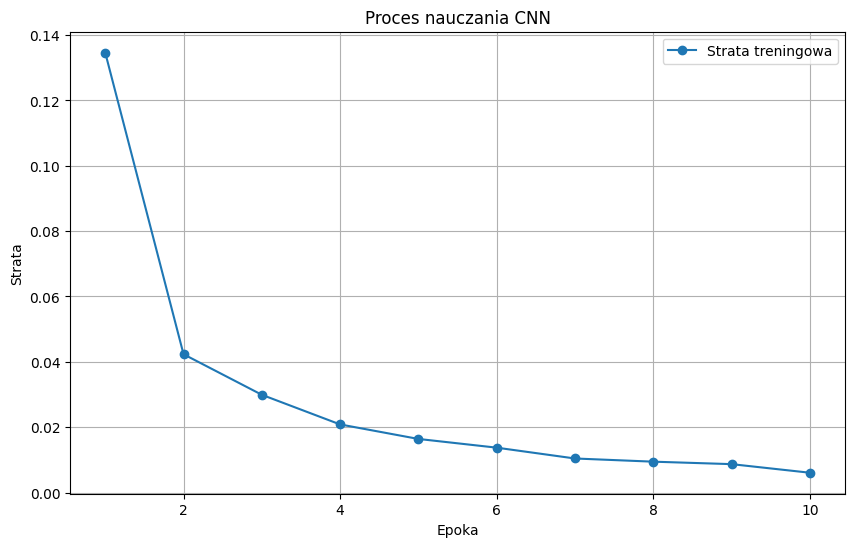

Dokładność modelu na zbiorze testowym: 99.10%


In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Definicja modelu CNN
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Przygotowanie danych
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Inicjalizacja modelu, funkcji kosztu i optymalizatora
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Trenowanie modelu
epochs = 10
loss_history = []
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    epoch_loss = running_loss / len(trainloader)
    loss_history.append(epoch_loss)
    print(f"Epoka {epoch + 1}, Strata: {epoch_loss:.4f}")

# Wizualizacja procesu nauczania
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_history, marker='o', label='Strata treningowa')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.title('Proces nauczania CNN')
plt.legend()
plt.grid()
plt.show()

# Testowanie modelu
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Dokładność modelu na zbiorze testowym: {accuracy:.2f}%")


In [30]:
#! pip install torchvision